# Actividad
(Haz doble clic en esta celda y completa los datos correspondientes a tu equipo)

Rodolfo Sandoval Schipper A01720253

Facundo Marroquín Treviño A01383541

Alberto Ivan Tamez Gonzalez A01026999

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Esta actividad se evaluará de acuerdo a la rúbrica en Canvas.

Al integrante que no participe en la actividad no se le tomará en cuenta para la calificación.

El límite para entregar las actividades es el viernes antes de las 23:59.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


**Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 54289 bytes


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
import pandas as pd
import io
archivo = pd.read_csv(io.StringIO(uploaded['insurance.csv'].decode('utf-8')))
archivo1 = archivo.replace('yes', 1)
archivo2 = archivo1.replace('no', 0)
archivo3 = archivo2.replace('northeast', 0)
archivo4 = archivo3.replace('southeast', 1)
archivo5 = archivo4.replace('southwest', 2)
archivo6 = archivo5.replace('northwest', 3)
archivo7 = archivo6.replace('male', 0)
archivo8 = archivo7.replace('female', 1)
print(archivo8)


      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       2  16884.92400
1      18    0  33.770         1       0       1   1725.55230
2      28    0  33.000         3       0       1   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       0   2205.98080
1335   18    1  36.850         0       0       1   1629.83350
1336   21    1  25.800         0       0       2   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

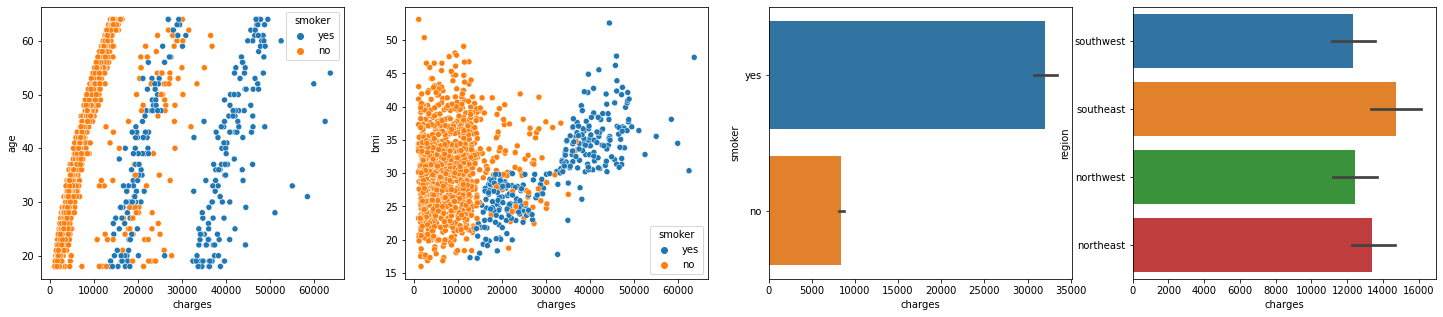

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs= plt.subplots(1,4, figsize=(25, 5))
sns.scatterplot(data=archivo, x = 'charges', y='age', ax=axs[0], hue = 'smoker')
sns.scatterplot(data=archivo, x = 'charges', y='bmi', ax=axs[1], hue ='smoker')
sns.barplot(data=archivo, y='smoker', x='charges', ax=axs[2])
sns.barplot(data=archivo, y='region', x='charges', ax=axs[3])

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

De acuerdo a las graficas anteriores, podemos identificar que si tienes una mayor edad y si fumas te cobran mas. Sin embargo, si no fumas te cobran menos. Las regiones indican que en el este los pagos son mayores que en el oeste.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()

lm1.fit(archivo[['age']], archivo['charges'])
print('age')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(archivo[['age']], archivo['charges']), '\n')


lm2 = LinearRegression()
lm2.fit(archivo[['bmi']], archivo['charges'])
print('bmi')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(archivo[['bmi']], archivo['charges']), '\n')


lm3 = LinearRegression()
lm3.fit(archivo[['children']], archivo['charges'])
print('children')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(archivo[['children']], archivo['charges']))

age
beta_0:  3165.885006063021
beta_1:  [257.72261867]
Score:  0.08940589967885804 

bmi
beta_0:  1192.9372089611497
beta_1:  [393.8730308]
Score:  0.03933913991786264 

children
beta_0:  12522.495549644098
beta_1:  [683.08938248]
Score:  0.004623758854459203


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?



Mejor = age,
Medio = bmi,
Peor =  children

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:
lm4 = LinearRegression()
lm4.fit(archivo8[['children', 'age', 'region']], archivo8['charges'])
print('beta_0: ', lm4.intercept_)
print('beta_1: ', lm4.coef_)
print('Score: ', lm4.score(archivo8[['children', 'age', 'region']], archivo8['charges']))
print('\n')

lm5 = LinearRegression()
lm5.fit(archivo8[['children', 'age', 'region', 'smoker']], archivo8['charges'])
print('beta_0: ', lm5.intercept_)
print('beta_1: ', lm5.coef_)
print('Score: ', lm5.score(archivo8[['children', 'age', 'region', 'smoker']], archivo8['charges']))
print('\n')

lm6 = LinearRegression()
lm6.fit(archivo8[['children', 'age', 'region', 'bmi']], archivo8['charges'])
print('beta_0: ', lm6.intercept_)
print('beta_1: ', lm6.coef_)
print('Score: ', lm6.score(archivo8[['children', 'age', 'region', 'bmi']], archivo8['charges']))
print('\n')

lm7 = LinearRegression()
lm7.fit(archivo8[['smoker', 'age', 'region', 'bmi']], archivo8['charges'])
print('beta_0: ', lm7.intercept_)
print('beta_1: ', lm7.coef_)
print('Score: ', lm7.score(archivo8[['smoker', 'age', 'region', 'bmi']], archivo8['charges']))
print('\n')

lm8 = LinearRegression()
lm8.fit(archivo8[['smoker', 'age', 'sex', 'bmi']], archivo8['charges'])
print('beta_0: ', lm8.intercept_)
print('beta_1: ', lm8.coef_)
print('Score: ', lm8.score(archivo8[['smoker', 'age', 'sex', 'bmi']], archivo8['charges']))

beta_0:  3477.9425852574423
beta_1:  [ 576.03582763  255.74320281 -581.99464652]
Score:  0.09528541418900904


beta_0:  -2564.0399279490703
beta_1:  [  493.26768005   273.08771598  -195.27635723 23818.86658781]
Score:  0.7240596161086466


beta_0:  -6078.227817723931
beta_1:  [ 559.23902481  240.26481507 -482.51461755  327.21558414]
Score:  0.12202781662847595


beta_0:  -11535.978160236547
beta_1:  [23814.28695986   259.59403842   -78.51852395   321.83142029]
Score:  0.7475282279480592


beta_0:  -11742.535702854304
beta_1:  [23833.87003847   259.45318189   109.04110867   323.0510586 ]
Score:  0.7474972680928911


 7. ¿Cuál modelo es el que nos conviene elegir?

El modelo de [['smoker', 'age', 'region', 'bmi']] tiene una R^2 mayor y mejor correlacion

8. Conclusiones 

A01720253 Rodolfo Sandoval = Durante el desarrollo del proyecto aprendimos a como graficar y obtener datos para relacionarlos. En este caso, utilizamos regresiones lineales para encontrar el coeficiente de correlacion para obtener si una relacion es perfecta. Nuestras graficas no tienen un coeficiente aproximado a 1, esto es debido a que los datos expresados con los puntos cambian conjuntamente a una tasa constante. Esto es debido a que las relaciones se afectan por causa y efecto. Tal que ninguna grafica en este proyecto tiene una relacion perfecta. Sin embargo, podemos comparar estos datos para tener informacion y asi predecir o evaluar indices. 



A01026999 Alberto Tamez = Durante este proyecto logramos repasar y entender todos los temas vistos durante la semana tec, mediante nuestro trabajo en equipo logramos conseguir un mejor entendimiento de las capacidades de los integrantes de nuestro equipo de esta manera logrando la mejor afinidad entre los miembros del equipo.




A01383541 Facundo Marroquín = En este proyecto se pusieron a prueba nuestros conocimientos de los temas que vimos en semana tec y nos dio una oportunidad de profundizar en ellos. El trabajo en equipo nos ayudo a entender nuestras capacidades y a ayudarnos a concretarlo.

# Guardar el resultado como pdf


* Escribe aquí abajo la liga de tu repositorio.

*   Elemento de la lista
*   Elemento de la lista



* (Haz doble clic en esta celda y copia la URL dentro del paréntesis)

[Liga al repositorio de https://github.com/lordschipper5/semanatec-arte-de-la-analitica.git

* Exporta el notebook a formato HTML.

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
! jupyter nbconvert --to HTML /content/drive/MyDrive/SemanaTec/arte-analitica/'6.3 - Actividad Regresion Linea.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemanaTec/arte-analitica/6.3 - Actividad Regresion Linea.ipynb to HTML
[NbConvertApp] Writing 466990 bytes to /content/drive/MyDrive/SemanaTec/arte-analitica/6.3 - Actividad Regresion Linea.html


* Haz doble clic en el archivo nuevo que se creó dentro de la carpeta `arte-analitica` y en la parte superior derecha dale clic en **imprimir**

* Imprime el archivo como *PDF* y súbelo a Canvas.